# Outline
[Using scikit learn](#scikit)

[Building linear regression from scratch](#no_scikit)

[Evaluation of both models](#eval)

In [144]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [145]:
salary_pd = pd.read_csv('Salary_Data.csv')

<a name='scikit'></a>
# Using scikit learn's linear regression estimator

In [146]:
salary_pd.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [147]:
X, y = salary_pd.drop('Salary', axis=1), salary_pd.Salary

In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.7,
                                                   random_state=42)

In [150]:
salary_pd.shape

(30, 2)

In [151]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [152]:
model.score(X_train, y_train)

0.9555371279184309

In [153]:
model.score(X_test, y_test)

0.9529487725319487

In [154]:
model.coef_, model.intercept_

(array([9252.99964662]), 27957.90209282236)

<a name ='no_scikit'>

# Building linear regression from scratch

In [155]:
x = np.array(salary_pd.YearsExperience)
y = np.array(salary_pd.Salary)

In [156]:
x[:5]

array([1.1, 1.3, 1.5, 2. , 2.2])

In [157]:
def compute_gradient(x, y, w, b):
    dj_dw = 0
    dj_db = 0
    j = len(x)
    
    for i in range(j):
        f_w_b = w*x[i] +b
        diff = f_w_b - y[i]
        dj_dw += diff*x[i]
        dj_db += diff
    dj_dw = dj_dw/j
    dj_db = dj_db/j
    return dj_dw, dj_db

In [158]:
def gradient_descent(X, x, y, w, b, learning_rate, compute_gradient, n_iter, plot_change, scikit_model):
    w_arr = []
    b_arr = []
    djw_arr = []
    djb_arr = []
    final_model = []
    scikit_pred = []
    for i in range(n_iter):
        dj_dw, dj_db = compute_gradient(x,y,w,b)
        w = w- learning_rate*dj_dw
        b = b- learning_rate*dj_db
        djw_arr.append(dj_dw)
        djb_arr.append(dj_db)
        w_arr.append(w)
        b_arr.append(b)
    print(f'the optimized coefficients are w:{w} and b:{b}')
    for i in range(len(x)):
        final_model.append(w*x[i]+b)
        scikit_pred = scikit_model.predict(X)
    plot_change(X, x, y, w_arr, b_arr, djw_arr, djb_arr, final_model, scikit_pred)
    return w,b

In [159]:
def plot_change(X, x, y, w_arr, b_arr, djw_arr, djb_arr, final_model, scikit_pred):
    fig, ax = plt.subplots(3, 2, figsize=(12, 10))

    ax[0, 0].plot(range(len(w_arr)), w_arr, label="w values", color="blue")
    ax[0, 0].set_title("Change in w over iterations")
    ax[0, 0].set_xlabel("Iterations")
    ax[0, 0].set_ylabel("w value")
    ax[0, 0].legend()

    ax[0, 1].plot(range(len(b_arr)), b_arr, label="b values", color="red")
    ax[0, 1].set_title("Change in b over iterations")
    ax[0, 1].set_xlabel("Iterations")
    ax[0, 1].set_ylabel("b value")
    ax[0, 1].legend()

    ax[1, 0].plot(range(len(djw_arr)), djw_arr, label="Gradient of w", color="green")
    ax[1, 0].set_title("Gradient of w over iterations")
    ax[1, 0].set_xlabel("Iterations")
    ax[1, 0].set_ylabel("dj_dw")
    ax[1, 0].legend()

    ax[1, 1].plot(range(len(djb_arr)), djb_arr, label="Gradient of b", color="purple")
    ax[1, 1].set_title("Gradient of b over iterations")
    ax[1, 1].set_xlabel("Iterations")
    ax[1, 1].set_ylabel("dj_db")
    ax[1, 1].legend()

    ax[2, 0].plot(x, final_model)
    ax[2, 0].scatter(x, y)

    ax[2,1].plot(x, scikit_pred, color='green', label='scikit learn model')
    ax[2,1].scatter(x,y)

    
    

    plt.tight_layout()
    plt.show()

In [160]:
def linear_regressor(w,b,x):
    x = np.array(x)
    pred_value = w*x +b
    return pred_value.flatten()

In [161]:
x

array([ 1.1,  1.3,  1.5,  2. ,  2.2,  2.9,  3. ,  3.2,  3.2,  3.7,  3.9,
        4. ,  4. ,  4.1,  4.5,  4.9,  5.1,  5.3,  5.9,  6. ,  6.8,  7.1,
        7.9,  8.2,  8.7,  9. ,  9.5,  9.6, 10.3, 10.5])

the optimized coefficients are w:9450.051678803738 and b:25791.598043212947


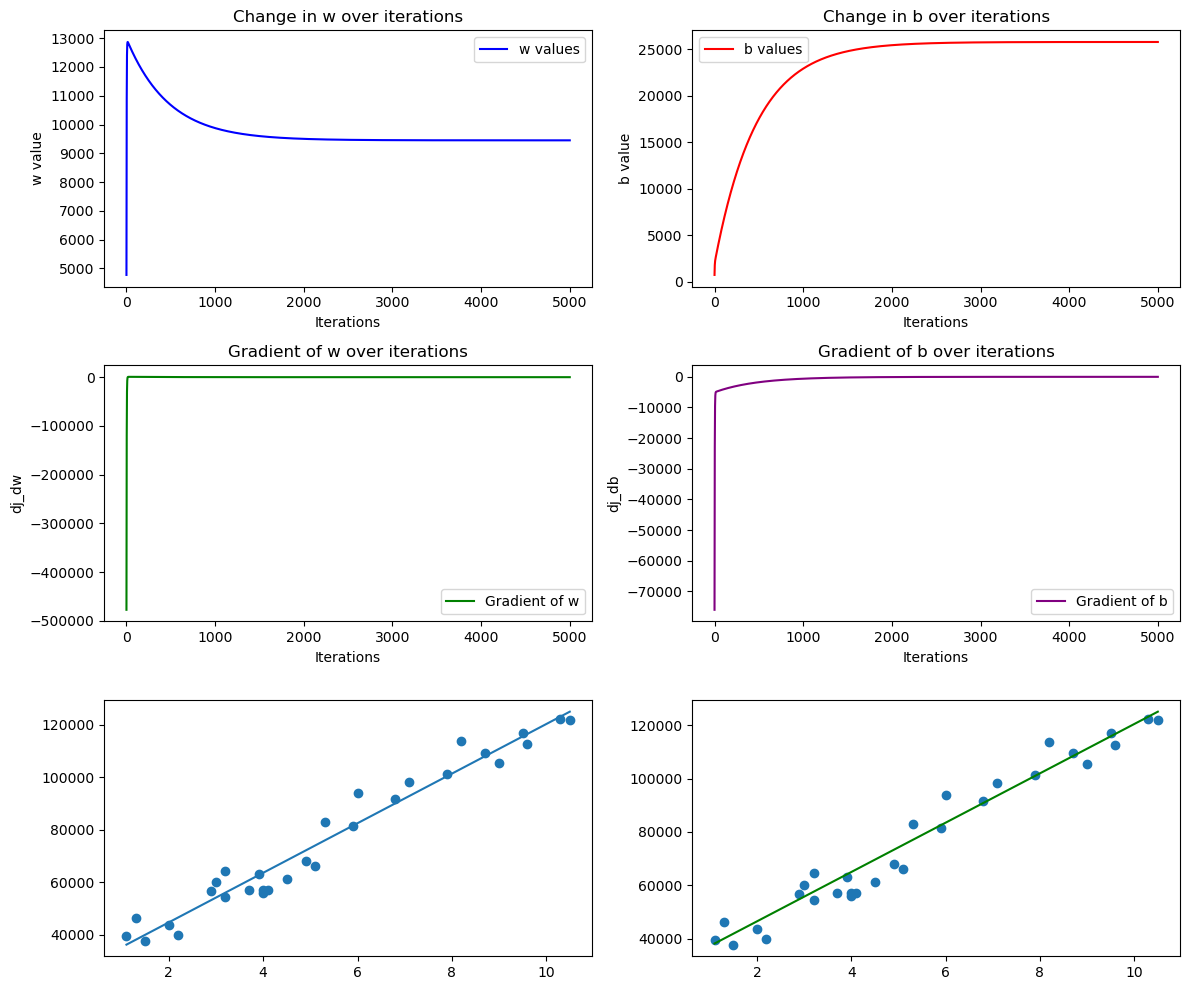

In [162]:
w,b = gradient_descent(X, x, y, 0, 0, 1.0e-2, compute_gradient, 5000, plot_change, model)

<a name='#eval'>
    
# Evaluation of both models

In [163]:
sci_pred = model.predict(X_test)
my_pred = linear_regressor(w,b,X_test)

my_accuracy_score = r2_score(y_test, my_pred)
scikit_accuracy_score = r2_score(y_test, sci_pred)

my_mae = mean_absolute_error(y_test, my_pred)
scikit_mae = mean_absolute_error(y_test, sci_pred)

my_mse = mean_squared_error(y_test, my_pred)
scikit_mse = mean_squared_error(y_test, sci_pred)

my_scores = pd.Series([my_accuracy_score, my_mae, my_mse])
scikit_scores = pd.Series([scikit_accuracy_score, scikit_mae, scikit_mse])

comparison_table = pd.DataFrame({
    "My Model": [my_accuracy_score, my_mae, my_mse],
    "Scikit-Learn Model": [scikit_accuracy_score, scikit_mae, scikit_mse]
}, index=["R² Score", "Mean Absolute Error", "Mean Squared Error"])

comparison_table.style.format("{:.6f}")

,My Model,Scikit-Learn Model
R² Score,0.956532,0.952949
Mean Absolute Error,5051.835896,5223.371480
Mean Squared Error,33403275.309403,36156721.836255


As you can see from the evaluation metrics above, my model edges the baseline linear regression model from scikit-learn.